## Deskripsi Perusahaan

Sebuah perusahaan e-commerce berskala nasional bernama “Shopshop” menjual berbagai produk kebutuhan sehari-hari melalui aplikasi dan website. Perusahaan memiliki ribuan pelanggan aktif dengan beragam profil: umur, lokasi, preferensi device, metode pembayaran, dan kebiasaan belanja.


## Business Context

Dalam industri e-commerce, persaingan sangat ketat. Biaya untuk mendapatkan pelanggan baru (customer acquisition) biasanya jauh lebih mahal daripada mempertahankan pelanggan lama (customer retention). Karena itu, perusahaan ingin memahami pola perilaku pelanggan yang berhenti berbelanja (churn) agar dapat meningkatkan strategi retensi.

## Problem Statement


1. Tingkat customer churn mulai meningkat, terutama di segmen pelanggan tertentu. Cari segmennya apa.
2. Perusahaan ingin mengetahui faktor-faktor utama yang mempengaruhi churn. 
3. Tujuan akhirnya adalah membantu tim manajemen membuat strategi untuk mengurangi churn dan meningkatkan loyalitas pelanggan.



## Data Preparation

Dictionary baris dan kolom

Data Variable Discerption
1. E Comm CustomerID = ID unik untuk setiap pelanggan.
2. E Comm Churn = Indikator apakah pelanggan berhenti berbelanja (1 = churn, 0 = aktif).
3. E Comm Tenure = Lama pelanggan bergabung atau bertransaksi di platform (dalam bulan/tahun tergantung data).
4. E Comm PreferredLoginDevice = Perangkat utama yang digunakan pelanggan untuk login (misalnya Mobile Phone, Computer, dll). 
5. E Comm CityTier = Klasifikasi tingkat kota tempat pelanggan tinggal (1 = kota besar, 2 = menengah, 3 = kecil).
6. E Comm WarehouseToHome = Jarak antara gudang dan rumah pelanggan (kemungkinan dalam kilometer).
7. E Comm PreferredPaymentMode = Metode pembayaran yang paling sering digunakan pelanggan (misalnya UPI, Debit Card, Credit Card).
8. E Comm Gender = Jenis kelamin pelanggan
9. E Comm HourSpendOnApp = Rata-rata waktu yang dihabiskan pelanggan di aplikasi (jam per hari/minggu).
10. E Comm NumberOfDeviceRegistered = Jumlah perangkat yang terdaftar oleh pelanggan pada akunnya.
11. E Comm PreferedOrderCat = Kategori produk yang paling sering dipesan pelanggan (misalnya Mobile, Laptop & Accessory).
12. E Comm SatisfactionScore = Skor kepuasan pelanggan terhadap layanan (biasanya skala 1–5).
13. E Comm MaritalStatus = Status pernikahan pelanggan (Single, Married, dll).
14. E Comm NumberOfAddress = Jumlah alamat yang disimpan oleh pelanggan dalam akun mereka.
15. E Comm Complain = Indikator apakah pelanggan pernah mengajukan keluhan (1 = pernah, 0 = tidak).
16. E Comm OrderAmountHikeFromlastYear = Persentase peningkatan jumlah pembelian dibandingkan tahun sebelumnya.
17. E Comm CouponUsed = Jumlah kupon diskon yang digunakan pelanggan.
18. E Comm OrderCount = Jumlah pesanan yang dilakukan oleh pelanggan.
19. E Comm DaySinceLastOrder = Jumlah hari sejak pesanan terakhir dilakukan.
20. E Comm CashbackAmount = Jumlah cashback yang diterima pelanggan (biasanya dalam satuan mata uang).

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\calic\Downloads\ECommerceDataset.xlsx')
df.head(20)



,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [3]:
print(f'Jumlah Baris dan Kolom yang ada pada Dataset ini adalah:')
df.info()

Jumlah Baris dan Kolom yang ada pada Dataset ini adalah:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus      

In [4]:
#Check unique value dari tiap object datatype
df.select_dtypes(include='object').nunique()

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

In [5]:
# Menampilkan informasi jumlah dan contoh nilai unik di setiap kolom
pd.set_option('display.max_colwidth', None)

listItem = []

for col in df.columns:
    # Ambil hanya 5 sample unik pertama untuk menghindari tampilan panjang
    unique_samples = df[col].unique()[:5]
    
    listItem.append([
        col,
        df[col].nunique(),
        unique_samples
    ])

# Membuat DataFrame ringkasan
table1Desc = pd.DataFrame(
    listItem,
    columns=['Column Name', 'Number of Unique Values', 'Unique Samples (first 5)']
)

# Menampilkan hasil
table1Desc    

,Column Name,Number of Unique Values,Unique Samples (first 5)
0,CustomerID,5630,"[50001, 50002, 50003, 50004, 50005]"
1,Churn,2,"[1, 0]"
2,Tenure,36,"[4.0, nan, 0.0, 13.0, 11.0]"
3,PreferredLoginDevice,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,3,"[3, 1, 2]"
5,WarehouseToHome,34,"[6.0, 8.0, 30.0, 15.0, 12.0]"
6,PreferredPaymentMode,7,"[Debit Card, UPI, CC, Cash on Delivery, E wallet]"
7,Gender,2,"[Female, Male]"
8,HourSpendOnApp,6,"[3.0, 2.0, nan, 1.0, 0.0]"
9,NumberOfDeviceRegistered,6,"[3, 4, 5, 2, 1]"


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


**Standarisasi value Kolom**

Dalam fase akan dilakukan standarisasi value didalam kolom-kolom

PreferredLoginDevice

Pada kolom ini perlu distandarisasi value *Mobile Phone* dan *Phone*. Karena kedua value tersebut terkait definisi yang serupa didalam konteks data ini

In [7]:
# Ubah semua variasi "Phone" menjadi "Mobile Phone"
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')


In [8]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

PreferredPaymentMode

Pada kolom ini perlu distandarisasi value *Cash on Delivery* dan *COD*, *CC* dan *Credit Card*. Karena kedua value tersebut terkait definisi yang serupa didalam konteks data ini

PreferredPaymentMode

Pada kolom ini perlu distandarisasi value *Cash on Delivery* dan *COD*, *CC* dan *Credit Card*. Karena kedua value tersebut terkait definisi yang serupa didalam konteks data ini

In [9]:
# 1️⃣ Standarisasi semua variasi COD
df.loc[df['PreferredPaymentMode'].str.contains('cod', case=False, na=False), 'PreferredPaymentMode'] = 'Cash on Delivery'
df.loc[df['PreferredPaymentMode'].str.contains('cash on delivery', case=False, na=False), 'PreferredPaymentMode'] = 'Cash on Delivery'

# 2️⃣ Standarisasi semua variasi Credit Card
df.loc[df['PreferredPaymentMode'].str.contains('cc', case=False, na=False), 'PreferredPaymentMode'] = 'Credit Card'
df.loc[df['PreferredPaymentMode'].str.contains('credit card', case=False, na=False), 'PreferredPaymentMode'] = 'Credit Card'

In [10]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

PreferedOrderCat

Pada kolom ini perlu distandarisasi value *Mobile* dan *Mobile Phone*. Karena kedua value tersebut terkait definisi yang serupa didalam konteks data ini

In [11]:
# Standarisasi "Mobile" → "Mobile Phone"
df.loc[df['PreferedOrderCat'].str.contains('mobile', case=False, na=False), 'PreferedOrderCat'] = 'Mobile Phone'


In [12]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

**Cek missing value**

In [13]:
df.isnull().any()

CustomerID                     False
Churn                          False
Tenure                          True
PreferredLoginDevice           False
CityTier                       False
WarehouseToHome                 True
PreferredPaymentMode           False
Gender                         False
HourSpendOnApp                  True
NumberOfDeviceRegistered       False
PreferedOrderCat               False
SatisfactionScore              False
MaritalStatus                  False
NumberOfAddress                False
Complain                       False
OrderAmountHikeFromlastYear     True
CouponUsed                      True
OrderCount                      True
DaySinceLastOrder               True
CashbackAmount                 False
dtype: bool

In [14]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [15]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

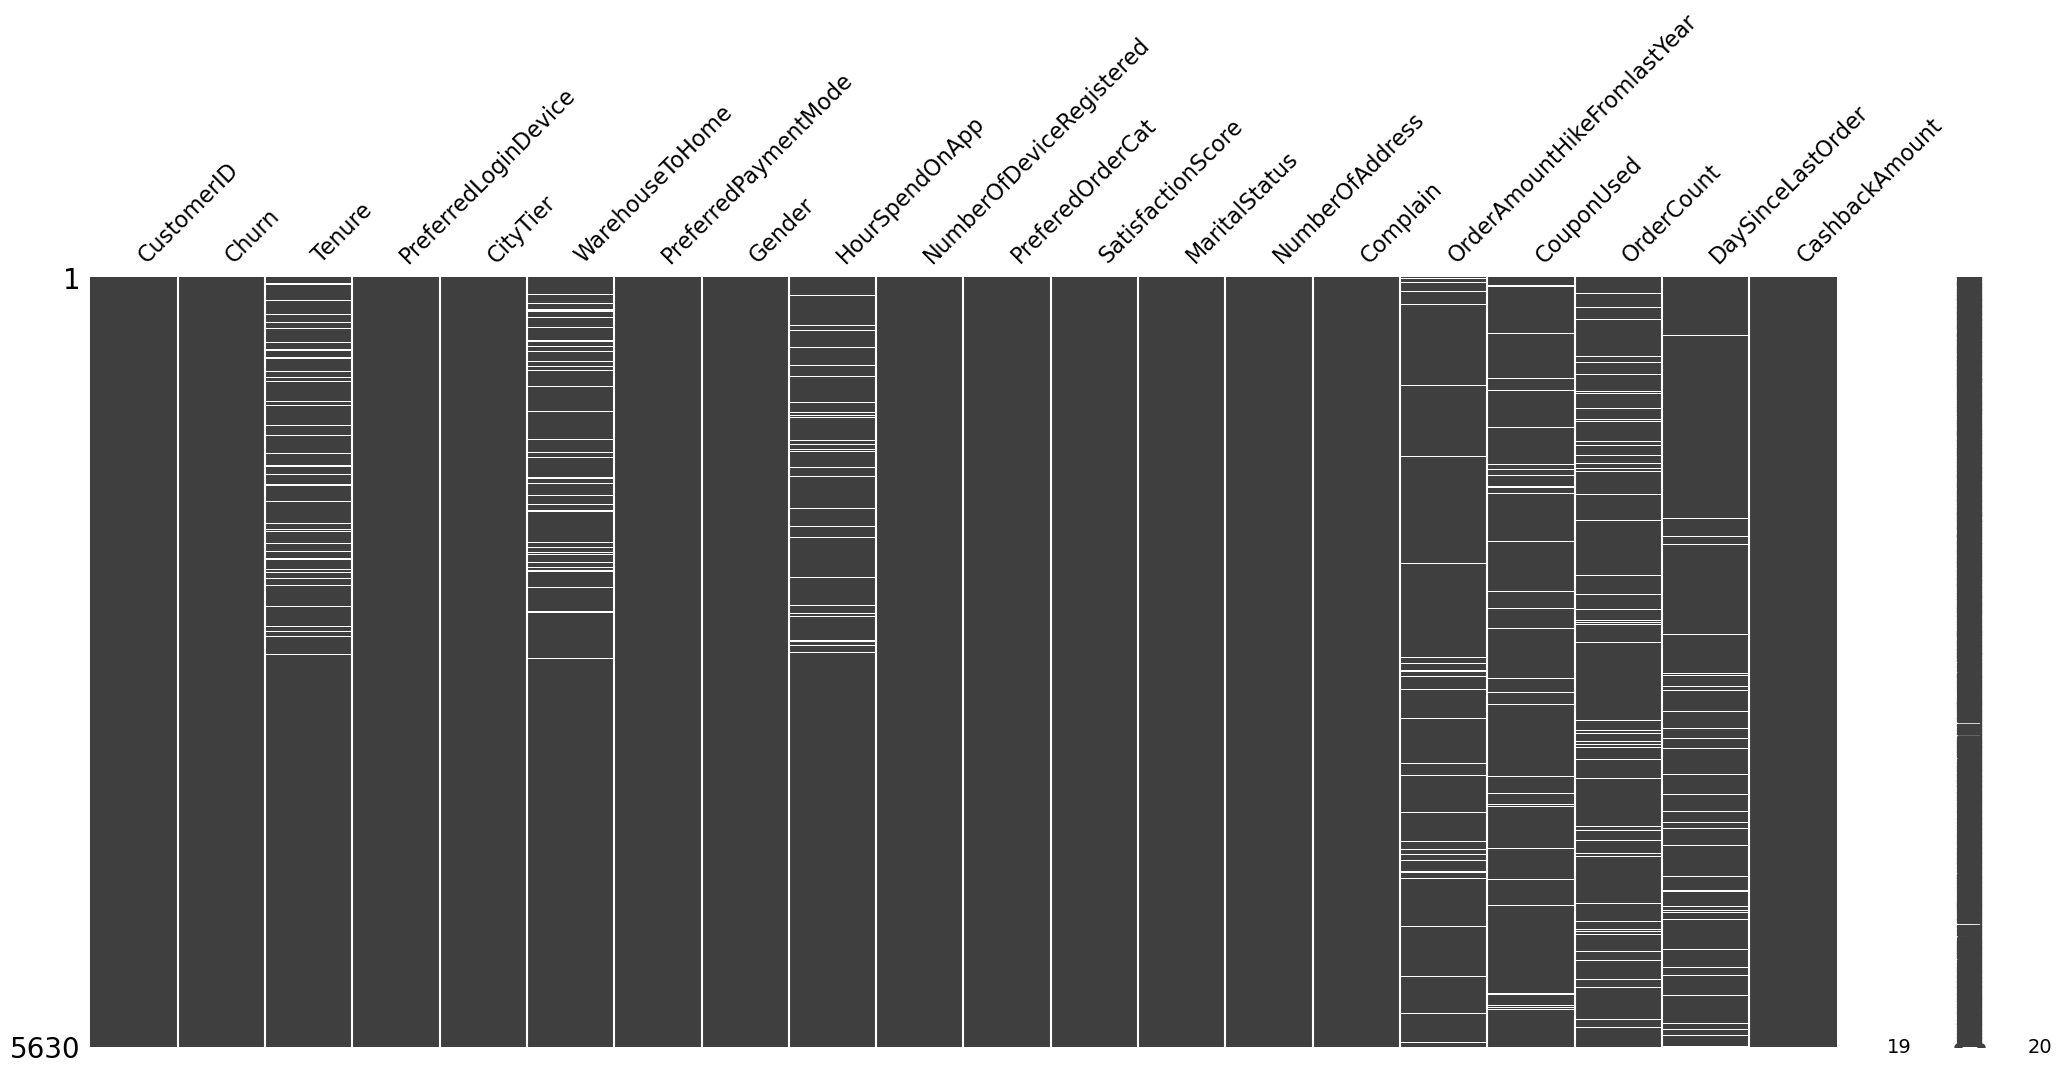

In [16]:
import missingno

missingno.matrix(df)

Total ada 1856 (32.97%) missing values, terdiri atas:
1. Tenure 264
2. WarehouseToHome 251
3. HourSpendOnApp 255
4. OrderAmountHikeFromlastYear 265
5. CouponUse 256
6. OrderCount 258
7. DaySinceLastOrder 307

Action missing value beserta alasan
1. Tenure - kemungkinan menggunakan mean mobile
2. WarehouseToHome - Mean imputasi berdasarkan CityTier
3. HourSpendOnApp - Median imputasi
4. OrderAmountHikeFromlastYear - Median imputasi (karena ada outlier/skew)
5. CouponUse - isi dengan 3 as a default number (karena didominasi grocery + others dengan proporsi missing value ~95%)
6. OrderCount - isi 0 jika nan (Didominasi dengan grocery + fashion)
7. DaySinceLastOrder - same case dengan coupon dan ordercount

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


Kolom Tenure

In [18]:
total_rows = len(df)
missing_count = df['Tenure'].isna().sum()
missing_pct = (missing_count / total_rows * 100).round(2)

print(f"Missing di Tenure: {missing_count} baris ({missing_pct}%)")


Missing di Tenure: 264 baris (4.69%)


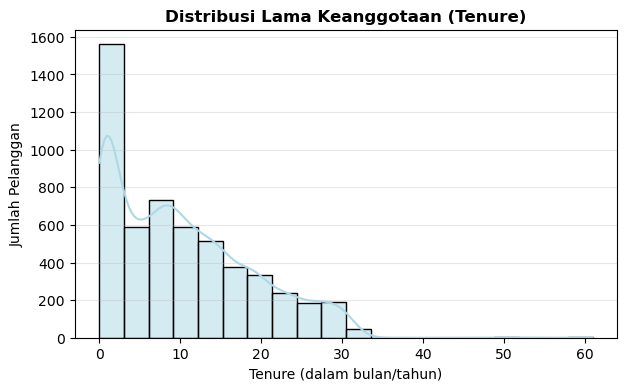

Nilai skewness: 0.74


In [19]:
plt.figure(figsize=(7,4))
sns.histplot(df['Tenure'], bins=20, kde=True, color='lightblue', edgecolor='black')
plt.title('Distribusi Lama Keanggotaan (Tenure)', fontsize=12, fontweight='bold')
plt.xlabel('Tenure (dalam bulan/tahun)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Nilai skewness:", round(df['Tenure'].skew(), 2))


Missing di Tenure: 264 baris (4.69%) → relatif kecil.

Distribusi Tenure: jelas miring ke kanan (right-skewed) — banyak pelanggan baru dengan tenure pendek, dan sedikit pelanggan lama.

Ini umum dalam dataset churn (karena pelanggan baru biasanya lebih banyak). 
Karena distribusi tidak normal dan proporsi kehilangan data tergolong kecil, digunakan median imputasi global untuk mengisi nilai kosong.
Pendekatan median dipilih karena lebih tahan terhadap pengaruh nilai ekstrem (pelanggan lama) dibandingkan mean, serta menjaga stabilitas distribusi lama keanggotaan pelanggan.

In [20]:
# Gunakan median imputasi global
median_tenure = df['Tenure'].median()
df['Tenure'] = df['Tenure'].fillna(median_tenure)
df['Tenure'] = df['Tenure'].round().astype(int)

print(f"Median imputasi Tenure yang digunakan: {median_tenure}")

Median imputasi Tenure yang digunakan: 9.0


In [21]:
print(f"Total missing Tenure setelah imputasi: {df['Tenure'].isna().sum()}")

Total missing Tenure setelah imputasi: 0


Kolom Warehouse to Home

Kolom Warehouse to Home menggunakan metode *mean imputasi berdasarkan Kolom Citytier*  karena bertujuan mempertahankan konteks geografis — pelanggan di kota besar biasanya jaraknya ke gudang lebih dekat daripada kota kecil. 

Perlu dicari dulu mean dari masing-masing *Citytier*. 

In [22]:
df.groupby('CityTier')['WarehouseToHome'].mean().round(0)

CityTier
1    16.0
2    15.0
3    16.0
Name: WarehouseToHome, dtype: float64

Setelah Itu di Imputasi

In [23]:
# Imputasi missing value WarehouseToHome berdasarkan mean tiap CityTier
df['WarehouseToHome'] = df.groupby('CityTier')['WarehouseToHome'].transform(
    lambda x: x.fillna(x.mean())
)

df['WarehouseToHome'].isna().sum()

np.int64(0)

Kolom HourSpendOnApp 

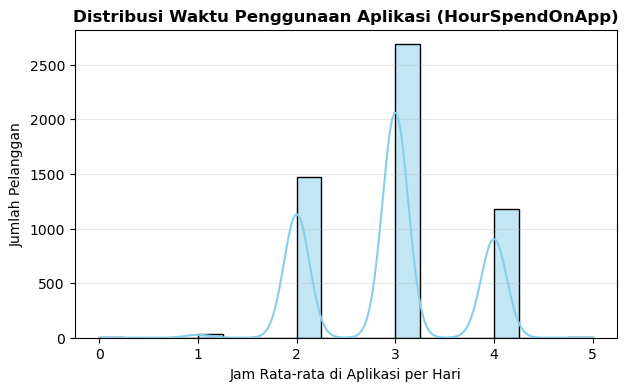

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.histplot(df['HourSpendOnApp'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribusi Waktu Penggunaan Aplikasi (HourSpendOnApp)', fontsize=12, fontweight='bold')
plt.xlabel('Jam Rata-rata di Aplikasi per Hari')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.show()


Nilai kosong pada kolom HourSpendOnApp diisi menggunakan median imputasi, karena distribusi waktu penggunaan aplikasi cenderung tidak normal dan mengandung nilai ekstrem (outlier).
Metode median menjaga kestabilan nilai tengah tanpa terpengaruh oleh pengguna dengan durasi akses yang terlalu lama.
Dengan cara ini, data menjadi lebih representatif dan siap untuk dianalisis lebih lanjut pada tahap eksplorasi perilaku pelanggan dan analisis churn.   

In [25]:
median_value = df['HourSpendOnApp'].median()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(median_value)

In [26]:
# Pastikan sudah tidak ada nilai NaN
df['HourSpendOnApp'].isna().sum()

# Tampilkan median yang digunakan
print("Median HourSpendOnApp yang digunakan untuk imputasi:", median_value)

Median HourSpendOnApp yang digunakan untuk imputasi: 3.0


In [27]:
df['HourSpendOnApp'].isna().sum()

np.int64(0)

Kolom OrderAmountHikeFromlastYear 

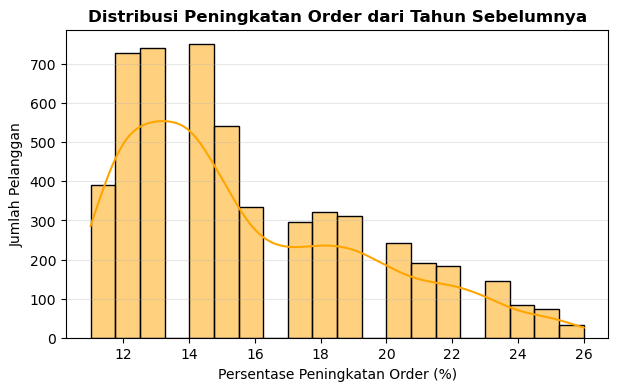

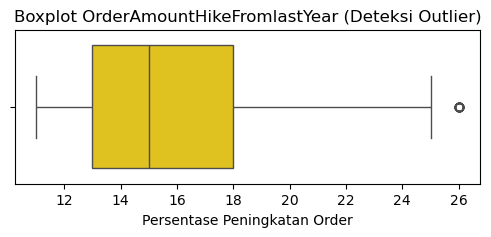

In [28]:
# === Histogram + KDE ===
plt.figure(figsize=(7,4))
sns.histplot(df['OrderAmountHikeFromlastYear'], bins=20, kde=True, color='orange', edgecolor='black')
plt.title('Distribusi Peningkatan Order dari Tahun Sebelumnya', fontsize=12, fontweight='bold')
plt.xlabel('Persentase Peningkatan Order (%)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.show()

# === Boxplot untuk deteksi outlier ===
plt.figure(figsize=(6,2))
sns.boxplot(x=df['OrderAmountHikeFromlastYear'], color='gold')
plt.title('Boxplot OrderAmountHikeFromlastYear (Deteksi Outlier)')
plt.xlabel('Persentase Peningkatan Order')
plt.show()

Cenderung skewed ke kanan, karena sebagian besar pelanggan kenaikan order-nya kecil, tapi ada beberapa yang naik besar sekali (outlier).

Karena itu, median lebih cocok dibanding mean untuk mengisi missing value.

In [29]:
# Hitung median
median_order_hike = df['OrderAmountHikeFromlastYear'].median()

# Imputasi missing value dengan median
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(median_order_hike)

In [30]:
# Pastikan tidak ada lagi nilai NaN
df['OrderAmountHikeFromlastYear'].isna().sum()

# Tampilkan median yang digunakan
print("Median OrderAmountHikeFromlastYear digunakan untuk imputasi:", median_order_hike)

Median OrderAmountHikeFromlastYear digunakan untuk imputasi: 15.0


Kolom CouponUse

Dalam menganalisa kolom Couponuse, ditemukan pola missing value hanya ditemukan dibeberapa kategori tertentu

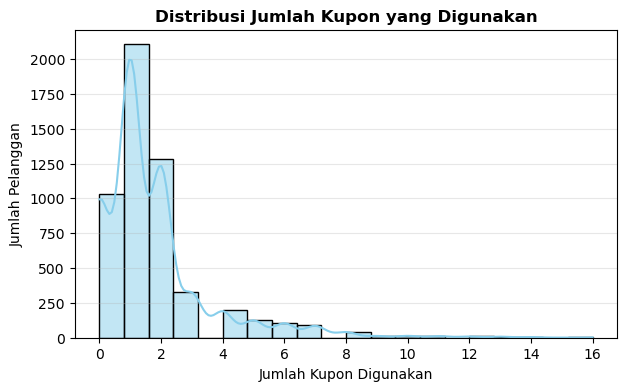

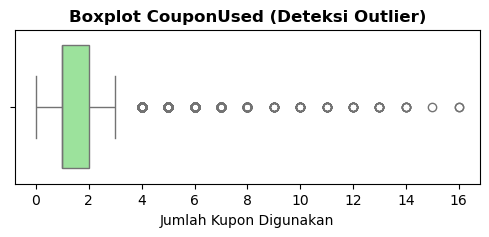

In [31]:
# === Histogram + KDE (Distribusi Umum) ===
plt.figure(figsize=(7,4))
sns.histplot(df['CouponUsed'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Kupon yang Digunakan', fontsize=12, fontweight='bold')
plt.xlabel('Jumlah Kupon Digunakan')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.show()

# === Boxplot untuk Deteksi Outlier ===
plt.figure(figsize=(6,2))
sns.boxplot(x=df['CouponUsed'], color='lightgreen')
plt.title('Boxplot CouponUsed (Deteksi Outlier)', fontsize=12, fontweight='bold')
plt.xlabel('Jumlah Kupon Digunakan')
plt.show()

Visualisasi distribusi kolom CouponUsed menunjukkan bahwa sebagian besar pelanggan hanya menggunakan sedikit kupon (distribusi cenderung ke kiri).
Namun terdapat beberapa pelanggan dengan frekuensi penggunaan kupon jauh lebih tinggi, yang dapat dianggap sebagai outlier perilaku.
Kondisi ini menegaskan bahwa metode imputasi yang robust seperti median akan lebih sesuai dibanding mean, karena lebih tahan terhadap pengaruh nilai ekstrem.

In [32]:
missing_pct = (256 / len(df)) * 100
print(round(missing_pct, 2))

4.55


Proporsi missing valuenyanya sekitar 4.5%.

Artinya:

Proporsi missing rendah (<5%),

Secara statistik aman untuk dilakukan imputasi sederhana,

Namun tetap perlu dicek apakah missing itu acak atau terpusat di kategori tertentu.

In [33]:
df['CouponUsed_missing'] = df['CouponUsed'].isna().astype(int)

missing_summary = (
    df.groupby('PreferedOrderCat')
      .agg(
          Missing_Count=('CouponUsed_missing', 'sum'),
          Total_Count=('CouponUsed_missing', 'count'),
          Avg_CouponUsed=('CouponUsed', 'mean')
      )
)

missing_summary['Missing_Pct'] = (
    missing_summary['Missing_Count'] / missing_summary['Total_Count'] * 100
).round(2)

missing_summary = missing_summary.sort_values(by='Missing_Pct', ascending=False)
missing_summary

,Missing_Count,Total_Count,Avg_CouponUsed,Missing_Pct
PreferedOrderCat,,,,
Grocery,186,410,3.178571,45.37
Others,58,264,2.699029,21.97
Fashion,12,826,2.337838,1.45
Laptop & Accessory,0,2050,1.651220,0.00
Mobile Phone,0,2080,1.372115,0.00


Total Missing = 256 data (≈4.5%), tapi tidak tersebar merata.
→ 95% dari missing terkonsentrasi di Grocery (45%) dan Others (22%).

Ini artinya missing tidak acak (MNAR) — ada pola berdasarkan kategori produk.

Nilai Avg_CouponUsed di kategori Grocery (3.18) dan Others (2.70) jauh di atas kategori lain,
artinya pelanggan di kategori ini memang lebih aktif menggunakan kupon.

Jadi, jika nilai hilang isi 0 secara global, akan menghapus perilaku asli pelanggan Grocery & Others → bias besar terhadap churn analysis nanti.

Karena kedua kategori ini memiliki rata-rata penggunaan kupon yang tinggi, nilai kosong pada kategori tersebut diimputasi menggunakan rata-rata per kategori (Grocery = 3.18, Others = 2.70).
Sedangkan pada kategori lain yang proporsi kehilangan datanya kecil (<5%), nilai kosong diisi 0, merepresentasikan pelanggan yang belum pernah menggunakan kupon.
Pendekatan ini menjaga integritas perilaku pelanggan antar segmen produk tanpa menggeser distribusi asli data.

In [34]:
# Imputasi berdasarkan hasil analisis aktual
high_missing = ['Grocery', 'Others']

df.loc[df['PreferedOrderCat'].isin(high_missing), 'CouponUsed'] = (
    df.groupby('PreferedOrderCat')['CouponUsed']
      .transform(lambda s: s.fillna(s.mean()))
)

# Kategori lain: isi 0
df.loc[~df['PreferedOrderCat'].isin(high_missing), 'CouponUsed'] = (
    df.loc[~df['PreferedOrderCat'].isin(high_missing), 'CouponUsed'].fillna(0)
)

In [35]:
# Pastikan tidak ada lagi nilai NaN
df['CouponUsed'].isna().sum()

np.int64(0)

Kolom OrderCount   

In [36]:
# Cek jumlah missing dan proporsinya
total_rows = len(df)
missing_count = df['OrderCount'].isna().sum()
missing_pct = (missing_count / total_rows * 100).round(2)

print(f"Missing di OrderCount: {missing_count} baris ({missing_pct}%)")


Missing di OrderCount: 258 baris (4.58%)


Proporsi missing valuenyanya sekitar 4.5%.

Artinya:

Proporsi missing rendah (<5%),

Secara statistik aman untuk dilakukan imputasi sederhana,

Namun tetap perlu dicek apakah missing itu acak atau terpusat di kategori tertentu.

Cek sebaran missing value

Kolom CouponUse

Dalam menganalisa kolom Couponuse, ditemukan pola missing value hanya ditemukan dibeberapa kategori tertentu

In [37]:
df['OrderCount_missing'] = df['OrderCount'].isna().astype(int)

ordercount_missing_summary = (
    df.groupby('PreferedOrderCat')
      .agg(
          Missing_Count=('OrderCount_missing', 'sum'),
          Total_Count=('OrderCount_missing', 'count'),
          Avg_OrderCount=('OrderCount', 'mean')
      )
)

ordercount_missing_summary['Missing_Pct'] = (
    ordercount_missing_summary['Missing_Count'] / ordercount_missing_summary['Total_Count'] * 100
).round(2)

ordercount_missing_summary = ordercount_missing_summary.sort_values(by='Missing_Pct', ascending=False)
ordercount_missing_summary


,Missing_Count,Total_Count,Avg_OrderCount,Missing_Pct
PreferedOrderCat,,,,
Grocery,122,410,5.697917,29.76
Fashion,136,826,4.233333,16.46
Laptop & Accessory,0,2050,2.766341,0.00
Mobile Phone,0,2080,2.182692,0.00
Others,0,264,5.250000,0.00


Missing total = 258 baris (4.58%) → relatif kecil secara global.

Tapi distribusinya tidak acak (MNAR): terkonsentrasi di
🔸 Grocery (29.8%)
🔸 Fashion (16.5%)

Kolom lain (Laptop, Mobile, Others) lengkap → tidak perlu diimputasi.

➡️ Artinya: pelanggan di kategori Grocery & Fashion memiliki kemungkinan lebih tinggi data pesanan tidak tercatat (misal: transaksi offline, promosi, atau order belum dikonfirmasi).
Jadi, tidak tepat kalau semua NaN langsung diisi 0.

Karena kolom ini bersifat numerik diskrit dan mencerminkan jumlah pesanan pelanggan, dilakukan median imputasi per kategori produk untuk menjaga representasi perilaku transaksi pelanggan yang berbeda antar kategori.
Pendekatan median dipilih karena lebih tahan terhadap outlier dibandingkan mean, serta menjaga stabilitas distribusi.
Setelah imputasi, seluruh nilai NaN berhasil diatasi tanpa mengubah pola distribusi data.

In [38]:
# Tentukan kategori dengan missing signifikan
high_missing = ['Grocery', 'Fashion']

# Imputasi median per kategori
df.loc[df['PreferedOrderCat'].isin(high_missing), 'OrderCount'] = (
    df.groupby('PreferedOrderCat')['OrderCount']
      .transform(lambda s: s.fillna(s.median()))
)

# Pastikan tipe integer
df['OrderCount'] = df['OrderCount'].round().astype(int)


Validasi

In [39]:
print("Missing OrderCount setelah imputasi:", df['OrderCount'].isna().sum())
df.groupby('PreferedOrderCat')['OrderCount'].median().round(2)


Missing OrderCount setelah imputasi: 0


PreferedOrderCat
Fashion               2.0
Grocery               4.0
Laptop & Accessory    2.0
Mobile Phone          2.0
Others                3.0
Name: OrderCount, dtype: float64

Kolom DaySinceLastOrder

In [40]:
total_rows = len(df)
missing_count = df['DaySinceLastOrder'].isna().sum()
missing_pct = (missing_count / total_rows * 100).round(2)

print(f"Missing di DaySinceLastOrder: {missing_count} baris ({missing_pct}%)")


Missing di DaySinceLastOrder: 307 baris (5.45%)


Proporsi 5.45% artinya sebagian kecil pelanggan belum memiliki catatan transaksi terakhir.

Karena DaySinceLastOrder = jumlah hari sejak order terakhir,
maka nilai kosong kemungkinan besar berarti:

1. pelanggan baru (belum pernah order sebelumnya), atau
2. data transaksi terakhir belum tercatat (missing non-random).



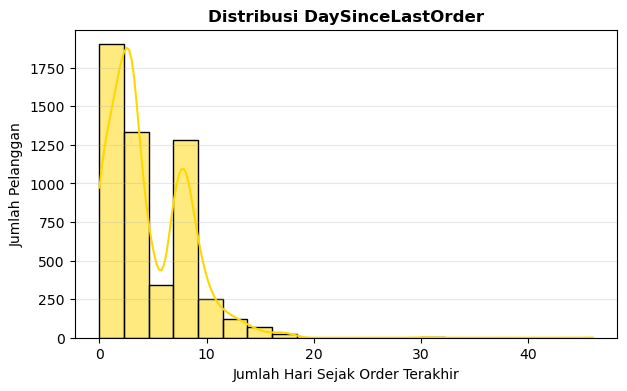

In [41]:
plt.figure(figsize=(7,4))
sns.histplot(df['DaySinceLastOrder'], bins=20, kde=True, color='gold', edgecolor='black')
plt.title('Distribusi DaySinceLastOrder', fontsize=12, fontweight='bold')
plt.xlabel('Jumlah Hari Sejak Order Terakhir')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.show()


Bentuk distribusinya miring ke kanan (right-skewed).
➜ Terlihat banyak pelanggan di rentang 0–10 hari,
dan jumlahnya menurun drastis setelah itu (ekor panjang ke kanan).

Ini menunjukkan sebagian besar pelanggan baru saja bertransaksi,
sedangkan sebagian kecil memiliki jarak waktu lama dari transaksi terakhirnya.

Untuk tindakan filling missing value adalah dengan cara imputasi median secara global, alasannya adalah:
1. Karena data right-skewed, mean terlalu sensitif terhadap pelanggan ekstrem (misalnya pelanggan yang sudah 40+ hari tidak order).
2. Median akan lebih stabil dan tetap merepresentasikan pelanggan tipikal, bukan ekstrem.
3. Median juga cocok untuk data integer diskrit seperti ini (jumlah hari → tidak pecahan).

In [42]:
median_global = df['DaySinceLastOrder'].median()
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(median_global)
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].round().astype(int)

print(f"Median imputasi yang digunakan: {median_global}")

Median imputasi yang digunakan: 3.0


In [43]:
# Pastikan tidak ada lagi nilai NaN
df['DaySinceLastOrder'].isna().sum()

np.int64(0)

Pastikan semua kolom missing valuenya terisi

In [44]:
df.isnull().any()

CustomerID                     False
Churn                          False
Tenure                         False
PreferredLoginDevice           False
CityTier                       False
WarehouseToHome                False
PreferredPaymentMode           False
Gender                         False
HourSpendOnApp                 False
NumberOfDeviceRegistered       False
PreferedOrderCat               False
SatisfactionScore              False
MaritalStatus                  False
NumberOfAddress                False
Complain                       False
OrderAmountHikeFromlastYear    False
CouponUsed                     False
OrderCount                     False
DaySinceLastOrder              False
CashbackAmount                 False
CouponUsed_missing             False
OrderCount_missing             False
dtype: bool

**Cek Duplikat**

In [45]:
# Hitung total baris duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat di dataset: {duplicate_count}")

Jumlah baris duplikat di dataset: 0


Setelah proses imputasi, dilakukan pemeriksaan duplikasi untuk memastikan tidak ada entri pelanggan ganda dalam dataset.

### EDA

Pertama-tama kita perlu tahu seberapa banyak proporsi customer yang churn pada dataet ini. 

In [46]:
# Hitung jumlah churn vs tidak churn
churn_counts = df['Churn'].value_counts()

# Hitung proporsinya dalam persen
churn_percent = (churn_counts / len(df) * 100).round(2)

print("Jumlah pelanggan churn vs tidak churn:")
print(churn_counts)
print("\nProporsi (%):")
print(churn_percent)    

Jumlah pelanggan churn vs tidak churn:
Churn
0    4682
1     948
Name: count, dtype: int64

Proporsi (%):
Churn
0    83.16
1    16.84
Name: count, dtype: float64


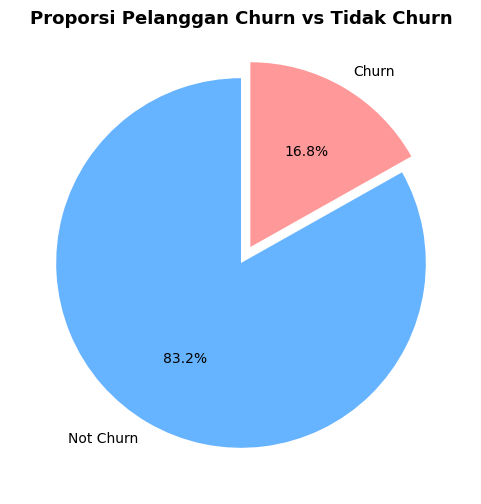

In [47]:
plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=['Not Churn', 'Churn'],
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999'],
    startangle=90,
    explode=(0, 0.1)
)
plt.title('Proporsi Pelanggan Churn vs Tidak Churn', fontsize=13, fontweight='bold')
plt.show()

Berdasarkan analisis proporsi pelanggan, ditemukan bahwa 16.8% pelanggan Shopshop mengalami churn, sedangkan 83.2% pelanggan masih aktif.

Secara bisnis, tingkat churn sebesar 16.8% menandakan perlunya strategi retensi yang lebih kuat untuk mempertahankan pelanggan.

Analisis lanjutan akan difokuskan pada identifikasi faktor-faktor utama yang memengaruhi churn, agar perusahaan dapat merancang intervensi berbasis data seperti personalisasi promosi dan peningkatan pengalaman pengguna.

Analisa variabel non-numerik

1. Analisa Churn per kategori produk

proses analisa ini diperlulkan untuk tahu kategori mana yang paling banyak pelanggan churn-nya.

In [48]:
# Hitung churn rate per kategori produk
churn_by_category = (
    df.groupby('PreferedOrderCat')['Churn']
      .agg(['count', 'sum', 'mean'])
      .rename(columns={'count':'Total_Customers','sum':'Churn_Count','mean':'Churn_Rate'})
      .sort_values(by='Churn_Rate', ascending=False)
      .round(3)
)

churn_by_category['Churn_Rate'] = churn_by_category['Churn_Rate'] * 100
churn_by_category


,Total_Customers,Churn_Count,Churn_Rate
PreferedOrderCat,,,
Mobile Phone,2080,570,27.4
Fashion,826,128,15.5
Laptop & Accessory,2050,210,10.2
Others,264,20,7.6
Grocery,410,20,4.9


C:\Users\calic\AppData\Local\Temp\ipykernel_4984\1004804276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


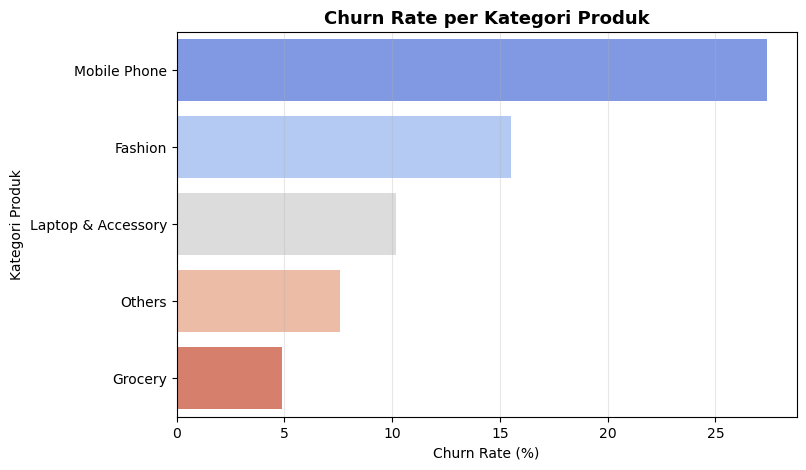

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Churn_Rate', 
    y=churn_by_category.index, 
    data=churn_by_category.reset_index(),
    palette='coolwarm'
)
plt.title('Churn Rate per Kategori Produk', fontsize=13, fontweight='bold')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Kategori Produk')
plt.grid(axis='x', alpha=0.3)
plt.show()


Churn tidak merata antar kategori produk. Mobile Phone dan Fashion adalah kategori berisiko tinggi churn. Sementara Grocery dan Laptop & Accessory = kategori retensi tinggi / pelanggan loyal.

1. Mobile Phone → Churn tertinggi (27.4%) 
    - Pelanggan di kategori ini paling banyak berhenti berbelanja.
    - Meski nilainya tinggi, total pelanggan di kategori ini juga besar (2080), dan 570 diantaranya churn.

    Ini menunjukkan potensi kehilangan pelanggan bernilai tinggi (karena produk gadget biasanya berharga besar).    
    Kemungkinan penyebab:
    1. Pola pembelian produk gadget yang jarang berulang (low frequency).
    2. Pelanggan cenderung pindah ke marketplace lain karena harga dan promo kompetitif.

2. Fashion → Churn Tinggi (15.5%) 
    - Sebagian Pelanggan dalam jumlah moderat mudah berhenti berbelanja
    -  Total Pelanggan ketiga terbesar (826), dan 128 diantaranya churn.

3. Laptop & Accessory → Churn moderat mulai mengarah ke tinggi(10.2%)
 - Masih dalam ambang wajar, tapi sudah melewati batas aman (10%).
 - Total pelanggan besar (2050), dan 210 diantaranya churn.

    Ini menunjukkan potensi kehilangan pelanggan bernilai tinggi (karena produk gadget biasanya berharga besar).    
    Kemungkinan penyebab:
    1. Pola pembelian produk gadget yang jarang berulang (low frequency).
    2. Pelanggan cenderung pindah ke marketplace lain karena harga dan promo kompetitif.

4. Others (7.6%) dan Grocery (4.9%) → Churn Rendah 
    - Kedua kategori ini memiliki churn terendah.


2. Analisa churn berdasarkan gender

In [50]:
# Hitung churn rate per gender
churn_by_gender = (
    df.groupby('Gender')['Churn']
      .agg(['count', 'sum', 'mean'])
      .rename(columns={'count': 'Total_Customers', 'sum': 'Churn_Count', 'mean': 'Churn_Rate'})
      .sort_values(by='Churn_Rate', ascending=False)
)

# Konversi ke persen
churn_by_gender['Churn_Rate'] = (churn_by_gender['Churn_Rate'] * 100).round(2)
churn_by_gender


,Total_Customers,Churn_Count,Churn_Rate
Gender,,,
Male,3384,600,17.73
Female,2246,348,15.49


C:\Users\calic\AppData\Local\Temp\ipykernel_4984\1716842481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


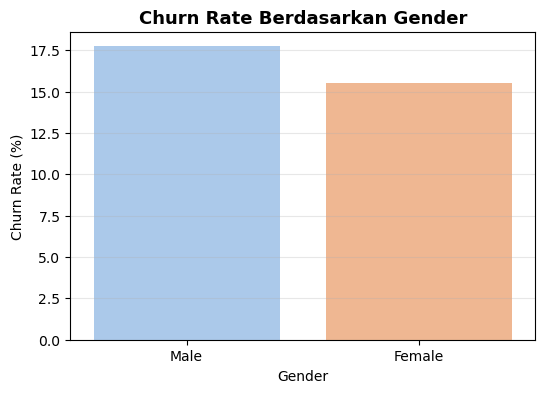

In [51]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=churn_by_gender.index,
    y=churn_by_gender['Churn_Rate'],
    palette='pastel'
)
plt.title('Churn Rate Berdasarkan Gender', fontsize=13, fontweight='bold')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Gender')
plt.grid(axis='y', alpha=0.3)
plt.show()

1. Male → Churn lebih tinggi (17.7%) : Pelanggan pria memiliki tingkat churn yang lebih tinggi dibandingkan wanita. Ini menunjukkan bahwa pelanggan pria lebih mudah meninggalkan platform setelah beberapa kali pembelian.

2. Female → Churn lebih rendah (15.5%) : Pelanggan wanita menunjukkan tingkat churn yang sedikit lebih rendah dan lebih loyal terhadap platform.

Selanjutnya cek kombinasi churn rate dengan masing-masing kategori produk

In [52]:
# Hitung churn rate per kombinasi Gender dan Kategori Produk
churn_gender_category = (
    df.groupby(['Gender', 'PreferedOrderCat'])['Churn']
      .agg(['count', 'sum', 'mean'])
      .rename(columns={'count': 'Total_Customers', 'sum': 'Churn_Count', 'mean': 'Churn_Rate'})
      .round(3)
)

# Ubah ke persen
churn_gender_category['Churn_Rate'] = churn_gender_category['Churn_Rate'] * 100
churn_gender_category

Total_Customers  Churn_Count  Churn_Rate
Gender PreferedOrderCat                                            
Female Fashion                         354           48        13.6
       Grocery                         198            4         2.0
       Laptop & Accessory              844           72         8.5
       Mobile Phone                    764          212        27.7
       Others                           86           12        14.0
Male   Fashion                         472           80        16.9
       Grocery                         212           16         7.5
       Laptop & Accessory             1206          138        11.4
       Mobile Phone                   1316          358        27.2
       Others                          178            8         4.5

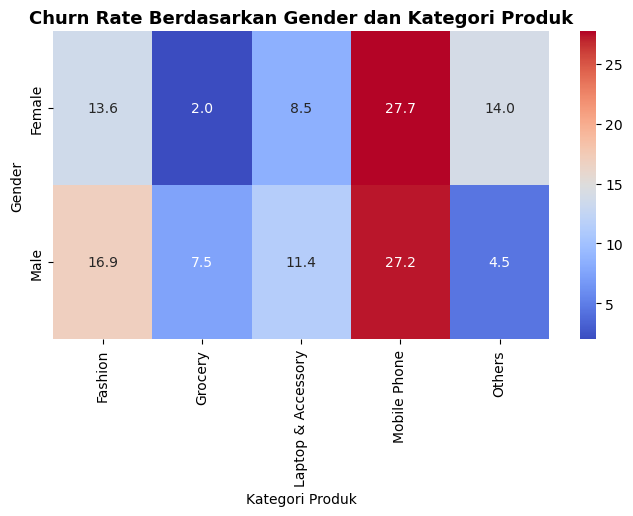

In [53]:
# Buat pivot table untuk visualisasi
pivot = churn_gender_category.reset_index().pivot(
    index='Gender', columns='PreferedOrderCat', values='Churn_Rate'
)

plt.figure(figsize=(8,4))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Churn Rate Berdasarkan Gender dan Kategori Produk', fontsize=13, fontweight='bold')
plt.xlabel('Kategori Produk')
plt.ylabel('Gender')
plt.show()

Analisis churn berdasarkan kombinasi gender dan kategori produk menunjukkan bahwa kategori Mobile Phone memiliki churn tertinggi pada kedua gender (±27%), sementara kategori Grocery memiliki churn terendah (2–7%).
Pelanggan pria menunjukkan churn yang lebih tinggi pada kategori Fashion (16.9%) dan Laptop (11.4%), sedangkan pelanggan wanita lebih stabil namun memiliki churn tinggi pada Mobile Phone (27.7%) dan Others (14%).
Temuan ini mengindikasikan bahwa perilaku churn dipengaruhi oleh jenis produk dan perbedaan preferensi gender.

3. Analisis Churn berdasarkan CityTier

In [54]:
# Hitung churn rate per CityTier
churn_by_city = (
    df.groupby('CityTier')['Churn']
      .agg(['count', 'sum', 'mean'])
      .rename(columns={
          'count': 'Total_Customers',
          'sum': 'Churn_Count',
          'mean': 'Churn_Rate'
      })
      .round(3)
)

# Ubah churn rate ke persen
churn_by_city['Churn_Rate'] = (churn_by_city['Churn_Rate'] * 100).round(2)

churn_by_city


,Total_Customers,Churn_Count,Churn_Rate
CityTier,,,
1,3666,532,14.5
2,242,48,19.8
3,1722,368,21.4


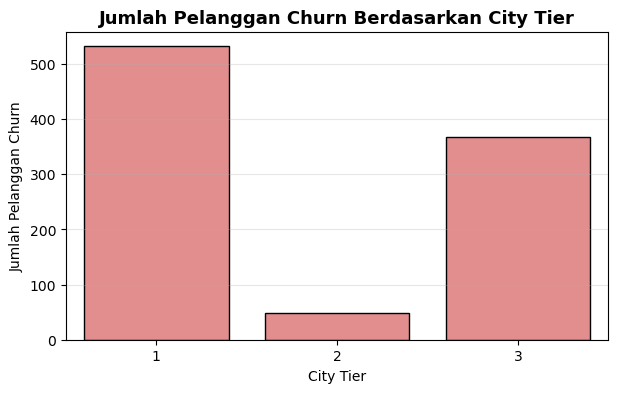

In [55]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=churn_by_city,
    x='CityTier',
    y='Churn_Count',
    color='lightcoral',
    edgecolor='black'
)
plt.title('Jumlah Pelanggan Churn Berdasarkan City Tier', fontsize=13, fontweight='bold')
plt.xlabel('City Tier')
plt.ylabel('Jumlah Pelanggan Churn')
plt.grid(axis='y', alpha=0.3)
plt.show()


1. CityTier 1 → Jumlah Churn Tertinggi (532 pelanggan), tapi Churn Rate Terendah (14.5%) : Kota besar memiliki jumlah pelanggan yang besar, sehingga volume churn tinggi secara absolut, tapi proporsinya tetap kecil.
2. CityTier 2 → Volume Churn Rendah (48), tapi Churn Rate Cukup Tinggi (19.8%) : Pelanggan di kota menengah relatif lebih sedikit, namun proporsi churn-nya tinggi.
3. CityTier 3 → Pelanggan Paling Rentan (Churn Rate 21.4%) : Pelanggan dari kota kecil paling rentan churn, bahkan hampir 1 dari 5 pelanggan berhenti belanja. Meski volume pelanggan tidak sebesar Tier 1, persentase churn-nya tertinggi.

City Tier x PreferOrderCat

In [56]:
df_churn = df[df['Churn'] == 1]

# Crosstab CityTier × PreferedOrderCat
ct_city_ordercat = pd.crosstab(df_churn['CityTier'], df_churn['PreferedOrderCat'])
ct_city_ordercat

PreferedOrderCat,Fashion,Grocery,Laptop & Accessory,Mobile Phone,Others
CityTier,,,,,
1,52,4,60,404,12
2,8,0,0,40,0
3,68,16,150,126,8


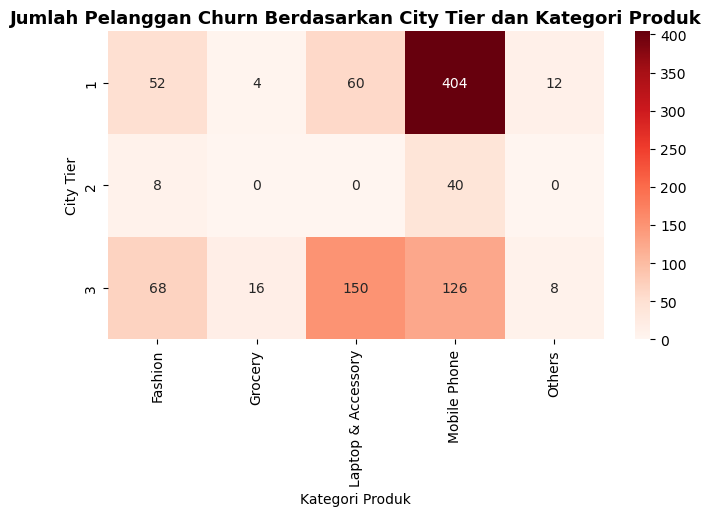

In [57]:
plt.figure(figsize=(8,4))
sns.heatmap(ct_city_ordercat, annot=True, fmt='d', cmap='Reds')
plt.title('Jumlah Pelanggan Churn Berdasarkan City Tier dan Kategori Produk', fontsize=13, fontweight='bold')
plt.xlabel('Kategori Produk')
plt.ylabel('City Tier')
plt.show()

1. Tier 1 (Kota Besar) — Volume churn tertinggi pada kategori Mobile Phone (404 pelanggan)
- Pelanggan dari kota besar paling banyak churn di kategori Mobile Phone, menyumbang 76% churn Tier 1. Hal ini bisa terjadi karena:
    1. Kategori Mobile Phone memiliki siklus pembelian panjang (produk jarang dibeli berulang).
    2. Banyak kompetitor e-commerce yang menawarkan harga lebih kompetitif di kota besar.
    3. Churn kategori lain seperti Laptop (60 pelanggan) masih relatif kecil.
    

2. Tier 2 (Kota Menengah) — Churn rendah tapi didominasi Mobile Phone (40 pelanggan)
    - Jumlah pelanggan churn di Tier 2 kecil (total 48), namun mayoritas juga berasal dari Mobile Phone. Menunjukkan pola yang konsisten: pelanggan dari berbagai kota sering kali churn setelah membeli produk bernilai tinggi. Hampir tidak ada churn pada kategori lain.

3. Tier 3 (Kota Kecil) — Churn cukup tinggi di Laptop (150) dan Mobile Phone (126)
    - Pelanggan Tier 3 memiliki churn terbesar kedua secara volume, terutama di kategori Laptop & Accessory (150) dan Mobile Phone (126). Hal ini menunjukkan bahwa pembelian hanya pada produk bernilai tinggi → tinggi risiko churn (karena pembelian jarang diulang).

Strategi Retensi: 
1. Inisiasi marketing campaign dikhususkan untuk pembelian dikategori Mobile Phone
2. Tawarkan diskon untuk pembelian aksesori gadget dan sku lain yang ada dikategori Mobile Phone
3. Buat upgrade trade-in agar pelanggan kembali bertransaksi (Reactivation)
4. Khusus ditier 3, berikan juga insentif berupa voucher gratis ongkir atau diskon ongkir khusus pada pembelian kategori Laptop & Accessory dan Mobile Phone dengan sistem regional promo

CityTier x PreferredPaymentMode

In [58]:
# Filter hanya pelanggan yang churn
df_churn = df[df['Churn'] == 1]

# Buat crosstab CityTier × PreferredPaymentMode
ct_city_payment = pd.crosstab(df_churn['CityTier'], df_churn['PreferredPaymentMode'])
ct_city_payment


PreferredPaymentMode,Cash on Delivery,Credit Card,Debit Card,E wallet,UPI
CityTier,,,,,
1,80,188,236,0,28
2,8,8,4,0,28
3,40,56,116,140,16


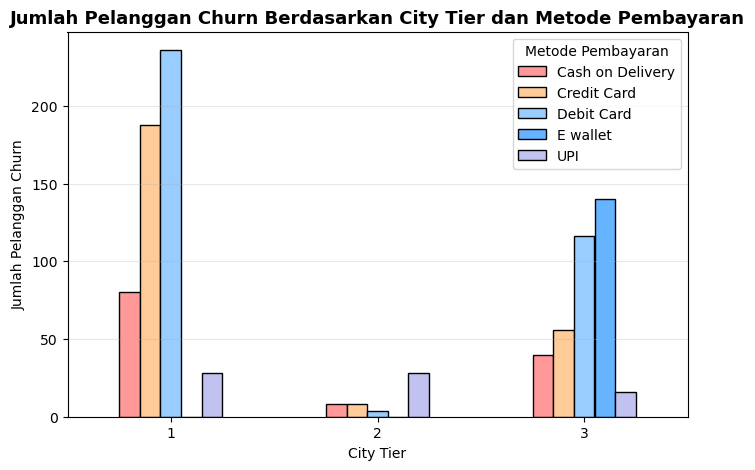

In [59]:
ct_city_payment.plot(
    kind='bar',
    figsize=(8,5),
    color=['#ff9999','#ffcc99','#99ccff','#66b3ff','#c2c2f0'],
    edgecolor='black'
)
plt.title('Jumlah Pelanggan Churn Berdasarkan City Tier dan Metode Pembayaran', fontsize=13, fontweight='bold')
plt.xlabel('City Tier')
plt.ylabel('Jumlah Pelanggan Churn')
plt.xticks(rotation=0)
plt.legend(title='Metode Pembayaran')
plt.grid(axis='y', alpha=0.3)
plt.show()


1. Tier 1 (Kota Besar): Churn tertinggi dari pelanggan Debit Card (236) dan Credit Card (188). Artinya pelanggan digital-savvy tapi mungkin churn karena user experience atau promo kompetitor.
2. Tier 2 (Kota Menengah): Churn rendah dan cukup seimbang antar metode. Indikasi pasar masih kecil, tidak perlu prioritas utama.
3. Tier 3 (Kota Kecil): Lonjakan churn besar dari pengguna E-Wallet (140) dan Debit Card (116). Bisa jadi pelanggan baru yang belum loyal atau tergoda promo platform lain.

Strategi Retensi:
1. Lakukan partnership strategis dengan perusahaan perbankan untuk bisa membuat benefit promosi dengan menggunakan metode pembayaran Debit & Credit Card.
2. Berikan promo-promo khusus, terkhusus pembayaran melalui Debit & Credit Card.
3. Berikan khusus program cicilan bunga rendah atau bunga 0% untuk meningkatkan ketertarikan pasar gadget (mobile phone, laptop, aksesoris gadget)
4. Berikan promo khusus diregion kota tier 3, terkhusus pada pembayaran E-wallet.

Analisa Variabel numerik

Korelasi antara churn dan variabel lain

In [60]:
# Pilih kolom numerik
num_cols = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderCount',
    'CouponUsed',
    'DaySinceLastOrder',
    'OrderAmountHikeFromlastYear',
    'CashbackAmount'
]

# Hitung korelasi dengan Churn
correlation = df[num_cols + ['Churn']].corr()['Churn'].sort_values(ascending=False)

print("Korelasi antara Churn dan variabel numerik:")
print(correlation)

Korelasi antara Churn dan variabel numerik:
Churn                          1.000000
WarehouseToHome                0.073350
HourSpendOnApp                 0.018816
OrderAmountHikeFromlastYear   -0.007075
CouponUsed                    -0.019846
OrderCount                    -0.026852
CashbackAmount                -0.154118
DaySinceLastOrder             -0.155871
Tenure                        -0.337831
Name: Churn, dtype: float64


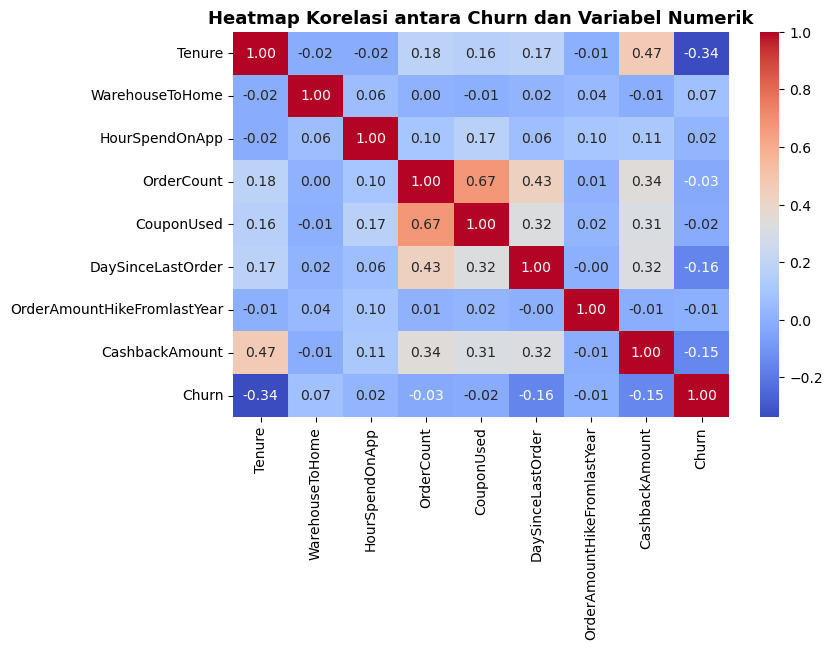

In [61]:
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols + ['Churn']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antara Churn dan Variabel Numerik', fontsize=13, fontweight='bold')
plt.show()

Tenure adalah Variabel yang paling berpengaruh terhadap churn, jadi selanjutnya analisa akan dilakukan konsentrasi pada variabel ini.




Perlu dilihat bagaimana pola distribusi variabel tenure untuk tahu pola churn dengan periode keanggotaan persebaran distribusinya seperti apa

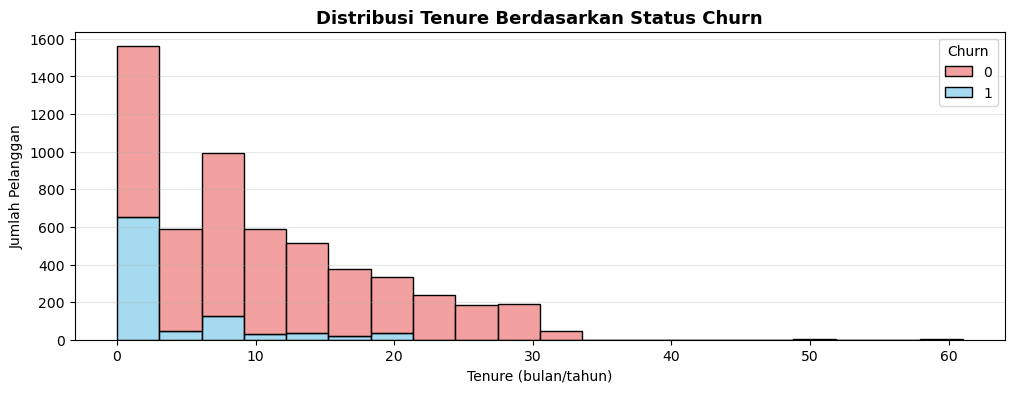

In [62]:
plt.figure(figsize=(12,4))
sns.histplot(
    data=df,
    x='Tenure',
    hue='Churn',
    multiple='stack',
    bins=20,
    palette=['lightcoral', 'skyblue'],
    edgecolor='black'
)
plt.title('Distribusi Tenure Berdasarkan Status Churn', fontsize=13, fontweight='bold')
plt.xlabel('Tenure (bulan/tahun)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.show()


In [63]:
# Buat kategori tenure (kuartil atau kustom)
df['Tenure_Group'] = pd.cut(
    df['Tenure'],
    bins=[0, 6, 12, 24, 48, df['Tenure'].max()],
    labels=['<6 bulan', '6-12 bulan', '1-2 tahun', '2-4 tahun', '>4 tahun']
)

# Hitung churn rate per kelompok tenure
churn_by_tenure = (
    df.groupby('Tenure_Group')['Churn']
      .agg(['count', 'sum', 'mean'])
      .rename(columns={'count':'Total_Customers','sum':'Churn_Count','mean':'Churn_Rate'})
)
churn_by_tenure['Churn_Rate'] = (churn_by_tenure['Churn_Rate'] * 100).round(2)
churn_by_tenure


C:\Users\calic\AppData\Local\Temp\ipykernel_4984\146078869.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Tenure_Group')['Churn']


,Total_Customers,Churn_Count,Churn_Rate
Tenure_Group,,,
<6 bulan,1642,425,25.88
6-12 bulan,1584,156,9.85
1-2 tahun,1467,95,6.48
2-4 tahun,425,0,0.00
>4 tahun,4,0,0.00


C:\Users\calic\AppData\Local\Temp\ipykernel_4984\1860179224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


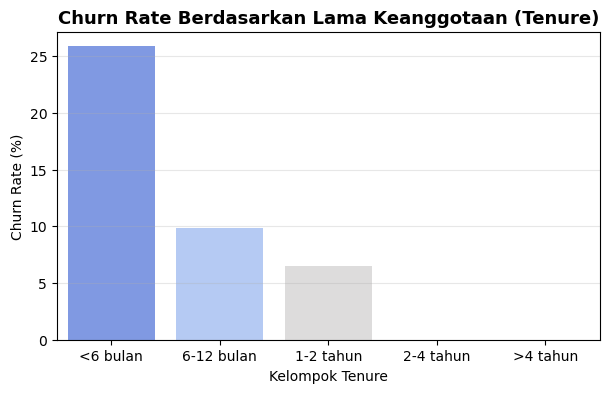

In [64]:
plt.figure(figsize=(7,4))
sns.barplot(
    x=churn_by_tenure.index,
    y=churn_by_tenure['Churn_Rate'],
    palette='coolwarm'
)
plt.title('Churn Rate Berdasarkan Lama Keanggotaan (Tenure)', fontsize=13, fontweight='bold')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Kelompok Tenure')
plt.grid(axis='y', alpha=0.3)
plt.show()


1. < 6 Bulan → Zona Risiko Tertinggi (25.88%)
    - Hampir 1 dari 4 pelanggan baru churn dalam enam bulan pertama. Artinya **pelanggan baru belum menemukan value proposition yang cukup kuat untuk tetap bertahan**. Ini merupakan fase paling kritis untuk retensi pelanggan.

    Strategi Retensi:
    1. Buat program **“Welcome Retention Campaign”** seperti cashback pembelian pertama, diskon ulang tahun akun, klaim koin harian atau free shipping streak.
    2. Kirimkan personalized onboarding email dalam 7 hari pertama (mis. “Tips berbelanja efisien di Shopshop”).
    3. Monitor perilaku early churn (user aktif 1–2x lalu berhenti).

2. 6–12 Bulan → Risiko Menurun (9.85%)
    - Churn menurun drastis hampir 60% dibanding 6 bulan pertama. Pelanggan pada fase ini **sudah mulai mengenal sistem, produk, dan promo**, namun masih ada **potensi kehilangan pelanggan musiman** (misalnya hanya belanja saat promo besar).
    
    Strategi Retensi:
    1. Luncurkan program loyalitas dasar (misalnya “Shopshop Silver Member”).
    2. Gunakan re-engagement ads bagi pelanggan yang inaktif >30 hari.

3. 1–2 Tahun → Pelanggan Mulai Loyal (6.48%)
    - Churn rate makin kecil, menunjukkan pelanggan ini **mulai loyal**. 
    
    Strategi Retensi:
    1. Tawarkan rewards berbasis akumulasi transaksi.
    2. Ajak ikut program referral untuk mendatangkan pelanggan baru.

4. #> 2 Tahun → Pelanggan Sangat Loyal (0%)
    - Tidak ada pelanggan churn di kelompok 2–4 tahun maupun >4 tahun. Menandakan **pelanggan lama benar-benar engaged** dan percaya penuh pada platform Shopshop. Mereka bisa jadi pengguna **“advocate”** yang mempromosikan secara organik.
    
    Strategi Retensi:
    1. Tawarkan status eksklusif (Gold/Platinum) dengan benefit seperti prioritas layanan, cashback lebih besar, atau preview promo lebih awal.
    2. Gunakan kelompok ini sebagai contoh customer success stories.

Analisis multivariabel

Sekarang kita akan fokus mendalami churn behavior di dua kategori churn terbesar **Mobile Phone** & **Laptop & Accessory**  —untuk mengetahui siapa yang churn, dari kota mana, metode pembayaran apa, dan kemungkinan alasannya.

Buat filter terlebih dahulu

In [65]:
df_churn_focus = df[(df['Churn'] == 1) &
                    (df['PreferedOrderCat'].isin(['Mobile Phone', 'Laptop & Accessory']))]
df_churn_focus.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CouponUsed_missing,OrderCount_missing,Tenure_Group
0,50001,1,4,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,9,1,11.0,1.0,1,5,159.93,0,0,<6 bulan
1,50002,1,9,Mobile Phone,1,8.0,UPI,Male,3.0,4,...,7,1,15.0,0.0,1,0,120.90,0,0,6-12 bulan
2,50003,1,9,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,...,6,1,14.0,0.0,1,3,120.28,0,0,6-12 bulan
3,50004,1,0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,...,8,0,23.0,0.0,1,3,134.07,0,0,NaN
4,50005,1,0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,...,3,0,11.0,1.0,1,3,129.60,0,0,NaN


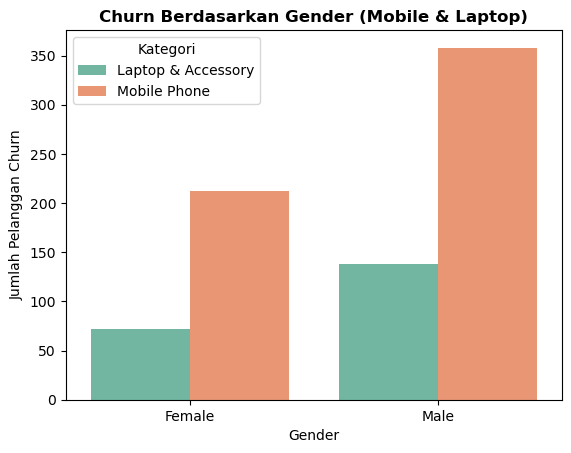

In [66]:
sns.countplot(data=df_churn_focus, x='Gender', hue='PreferedOrderCat', palette='Set2')
plt.title('Churn Berdasarkan Gender (Mobile & Laptop)', fontsize=12, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Jumlah Pelanggan Churn')
plt.legend(title='Kategori')
plt.show()

1. Pelanggan laki-laki (Male) mendominasi churn di dua kategori utama, terutama pada:
    - Mobile Phone: sekitar 350+ pelanggan churn.
    - Laptop & Accessory: sekitar 140 pelanggan churn.

2. Pelanggan perempuan (Female) juga mengalami churn, namun jumlahnya jauh lebih rendah di kedua kategori:
    - Sekitar 210 pelanggan churn untuk Mobile Phone.
    - Sekitar 70 pelanggan churn untuk Laptop & Accessory.

Kategori yang berhubungan dengan gadget ini memiliki churn tertinggi secara keseluruhan, baik dari laki-laki maupun perempuan.

Churn di kategori Laptop & Accessory juga didominasi oleh laki-laki, tetapi dengan volume yang lebih kecil.

Ini bisa disebabkan oleh:

1. Produk laptop dan aksesori memiliki frekuensi pembelian rendah (long purchase cycle).

2. Churn bisa terjadi karena pelanggan tidak punya kebutuhan berulang, bukan karena ketidakpuasan.

3. Pelanggan perempuan relatif lebih sedikit dalam kategori ini (basis pelanggan kecil → churn pun kecil).

Pelanggan laki-laki mendominasi churn pada kategori Mobile Phone dan Laptop & Accessory, menandakan bahwa segmen ini lebih sensitif terhadap harga, promo, dan siklus produk.


| Target                       | Rekomendasi                                                                    | Tujuan                                                   |
| ---------------------------- | ------------------------------------------------------------------------------ | -------------------------------------------------------- |
| **Laki-laki (Mobile Phone)** | Buat **program loyalitas upgrade device** (misal: trade-in + bonus poin)       | Mengurangi churn pada pembeli yang sering ganti gadget   |
| **Laki-laki (Laptop)**       | Tawarkan **bundle aksesoris / extended warranty** setelah pembelian            | Meningkatkan retensi pada kategori dengan siklus panjang |
| **Perempuan (Mobile Phone & Laptop)** | **Push logic SKU aksesoris gadget** yang bersifat feminis (misalnya aksesoris gadget yang lucu)                 | Menarik segmen perempuan yang lebih emotional-driven     |
| **Semua segmen**             | Gunakan **AI recommendation** untuk penawaran personal berbasis riwayat device | Meningkatkan relevansi promosi                           |


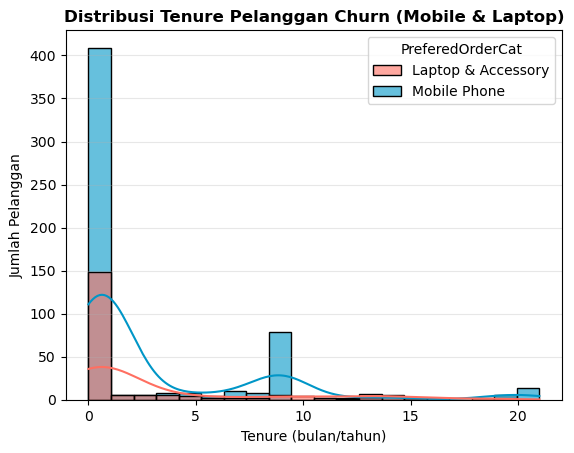

In [67]:
sns.histplot(
    data=df_churn_focus,
    x='Tenure',
    hue='PreferedOrderCat',
    bins=20,
    kde=True,
    palette=['#FF6F61', '#0096C7'],   # merah coral & biru laut
    alpha=0.6,                        # transparansi biar overlap-nya jelas
    edgecolor='black'                 # garis tepi biar rapi
)
plt.title('Distribusi Tenure Pelanggan Churn (Mobile & Laptop)', fontsize=12, fontweight='bold')
plt.xlabel('Tenure (bulan/tahun)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.show()


- Pola umum distribusi
    Distribusi kedua kategori sangat condong ke kiri (left-skewed / positif skew), artinya:
    - Sebagian besar pelanggan yang churn memiliki Tenure rendah — mereka baru menjadi pelanggan dalam waktu singkat.
    - Setelah Tenure melewati 10–12 bulan, jumlah pelanggan yang churn turun drastis.

Semakin lama pelanggan bertahan, semakin kecil kemungkinan mereka churn.

- Analisis per kategori

1. Mobile Phone (garis biru)
    - Memiliki puncak churn paling tinggi di awal Tenure (0–2 bulan), artinya:
    - Banyak pelanggan churn sangat cepat setelah mulai berbelanja produk Mobile Phone.
    - Distribusi menurun tajam setelah 5 bulan, menunjukkan pelanggan yang loyal cenderung bertahan lebih lama.
Hal ini menunjukkan early churn behavior — pelanggan baru mencoba aplikasi, beli 1–2 kali, lalu tidak kembali.

2. Laptop & Accessory (garis merah)
    - Pola churn mirip dengan Mobile Phone, tapi lebih landai dan cenderung menyebar hingga ±10 bulan.
    - Artinya pelanggan churn di kategori ini tidak langsung pergi, tetapi berhenti setelah beberapa waktu.
    - Hal ini bisa terjadi karena produk laptop memiliki siklus pembelian lebih panjang, sehingga pelanggan tidak merasa perlu melakukan transaksi berulang dalam waktu dekat.
Churn di kategori Laptop bukan karena ketidakpuasan, melainkan pasif churn (pembelian tunggal tanpa retensi lanjutan).

Sebagian besar pelanggan churn terjadi pada pelanggan baru dengan masa Tenure <6 bulan, menunjukkan kebutuhan kuat akan **strategi onboarding dan retensi pasca pembelian** di kategori Mobile Phone dan Laptop & Accessory. 

## Kesimpulan

Churn terkonsentrasi pada **16,8% dari total pelanggan**, di mana sebagian besar memiliki masa penggunaan (tenure) **kurang dari enam bulan** di platform Shopshop.

Di antara pengguna yang churn tersebut, porsi terbesar berasal dari **City Tier 1 dan Tier 3**, dengan **Debit Card dan Credit Card** sebagai **metode pembayaran yang paling umum** digunakan.

Transaksi menggunakan **E-Wallet di Tier 3** juga menunjukkan pola churn yang cukup menonjol, yang mengindikasikan bahwa pengguna pembayaran digital di kota-kota kecil **masih dalam tahap membangun kepercayaan dan loyalitas** terhadap platform. Hal ini menunjukkan perlunya **program keterlibatan lokal (localized engagement)** dan **insentif yang ditargetkan** untuk **memperkuat retensi pelanggan** pada segmen tersebut.

Kategori **Mobile Phone serta Laptop & Accessories** menjadi penyumbang terbesar terhadap tingkat churn (untuk kedua jenis gender). Dari perspektif perilaku konsumen, pelanggan pada kategori ini cenderung **memiliki frekuensi pembelian yang rendah karena siklus hidup produk yang panjang** dan sifat produk yang **tidak memerlukan transaksi pembelian rutin**. Akibatnya, perilaku churn mereka lebih sering disebabkan oleh **pola pembelian satu kali (one-time purchase)** dibandingkan karena ketidakpuasan terhadap platform.

# Rekomendasi

| Target                       | Rekomendasi                                                                    | Tujuan                                                   |
| ---------------------------- | ------------------------------------------------------------------------------ | -------------------------------------------------------- |
| **Laki-laki (Mobile Phone)** | Buat **program loyalitas upgrade device** (misal: trade-in + bonus poin)       | Mengurangi churn pada pembeli yang sering ganti gadget   |
| **Laki-laki (Laptop)**       | Tawarkan **bundle aksesoris / extended warranty** setelah pembelian            | Meningkatkan retensi pada kategori dengan siklus panjang |
| **Perempuan (Mobile Phone & Laptop)** | **Push logic SKU aksesoris gadget** yang bersifat feminis (misalnya aksesoris gadget yang lucu)                 | Menarik segmen perempuan yang lebih emotional-driven     |
| **Semua segmen**             | Gunakan **AI recommendation** untuk penawaran personal berbasis riwayat device | Meningkatkan relevansi promosi                           |


Untuk Terkait segmen pengguna metode pembayaran tertentu: 

1. Bangun kemitraan strategis dengan pihak bank untuk menawarkan manfaat promosi bagi transaksi menggunakan Debit dan Kartu Kredit.

2. Luncurkan promosi eksklusif untuk pelanggan yang menggunakan pembayaran Debit dan Kartu Kredit (diskon, cashback, program cicilan, dan sebagainya).

3. Perkenalkan program cicilan berbunga rendah atau 0% untuk meningkatkan minat pada kategori produk gadget (ponsel, laptop, dan aksesori).

4. Sediakan promosi regional khusus di kota Tier 3, dengan fokus pada metode pembayaran E-Wallet untuk memperkuat keterlibatan dan loyalitas pelanggan.